# Основные библиотеки

In [1]:
import pandas as pd # работа с таблицами
import numpy as np # для работы с массивами
import matplotlib.pyplot as plt # рисование графиков
%matplotlib inline 
# позволяет рисовать внутри блокнота
import seaborn as sns # надстройка над матплотлиб для красивого отображения

# настроим просмотр таблиц
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# 1. Предобработка данных

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep=';') # загружаем данные в DataFrame

In [3]:
data.head() # первые пять строчек

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.describe() # описание вещественных признаков

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data.describe(include=['object', 'bool']) # описание категориальных признаков и целевой "y"

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [6]:
# отношение классов

print(data['y'].value_counts())
print(data['y'].value_counts(normalize=True))

no     36548
yes     4640
Name: y, dtype: int64
no     0.887346
yes    0.112654
Name: y, dtype: float64


Наблюдается дисбаланс классов в отношении примерно 9:1. Согласившихся клиентов намного меньше. Метрика Accuracy не подойдет для решения данной задачи из-за "Accuracy Paradox" (https://en.wikipedia.org/wiki/Accuracy_paradox).

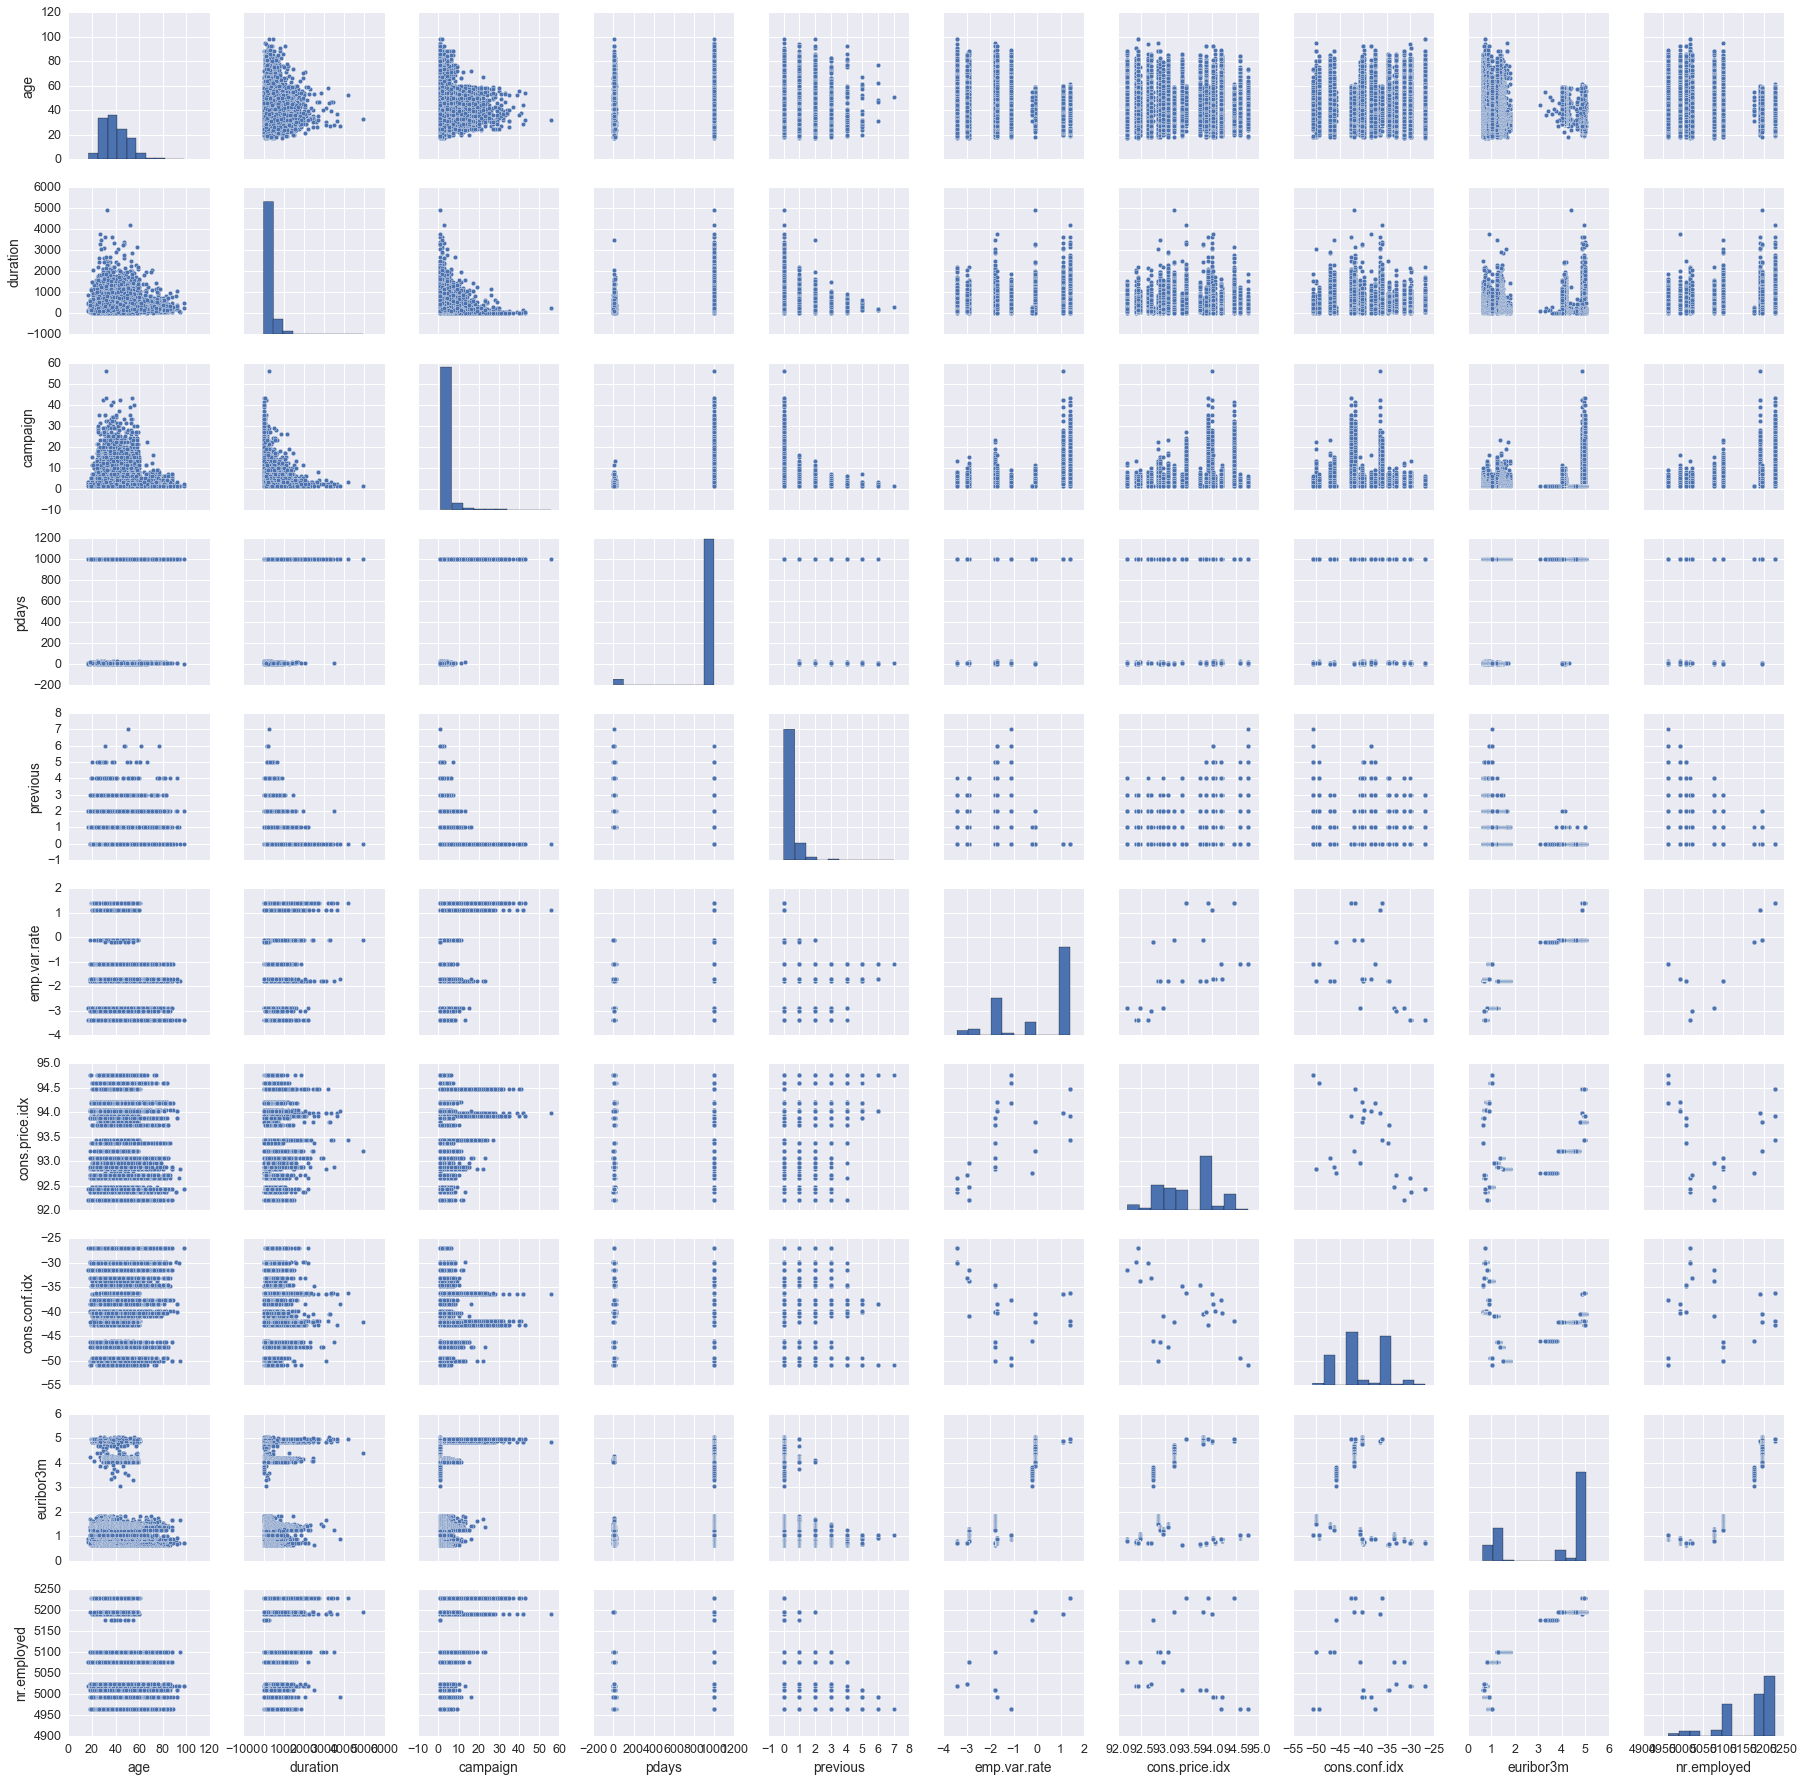

In [7]:
sns.set(font_scale=1.25) 

sns.pairplot(data) # совместные распределения

In [8]:
# корреляции вещественных признаков между собой и целевой переменной "y"

data_for_corr = data.copy()
data_for_corr['y'] = pd.factorize(data['y'])[0]

data_for_corr.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


In [9]:
# посчитаем корреляцию Пирсона и p_value (корреляция оказалась значима)

import scipy.stats as stats 

pears = stats.pearsonr(x = data['euribor3m'], y = data['emp.var.rate'])
print('r = %s, p_value = %s' % pears)

r = 0.972244671152, p_value = 0.0


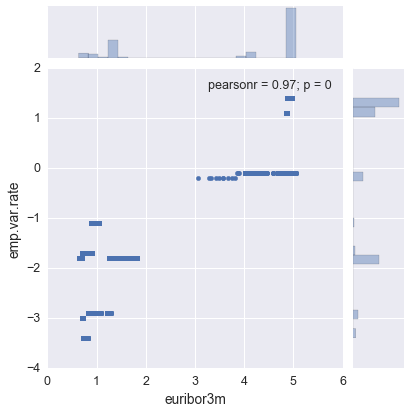

In [10]:
sns.jointplot(x='euribor3m', y='emp.var.rate', data=data, kind='scatter');

Слабая корреляция наблюдается между ответами и длительностью последнего звонка (duration). 

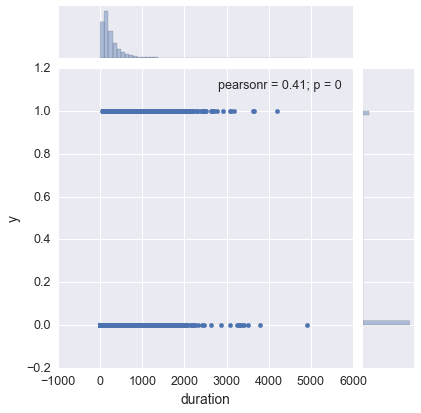

In [11]:
sns.jointplot(x='duration', y='y', data=data_for_corr, kind='scatter');

Из всех остальных корреляций с сильной связью (>0.7), пары признаков никак не связаны друг с другом, если говорить о возможной их зависимости.

### Некоторые закономерности в данных

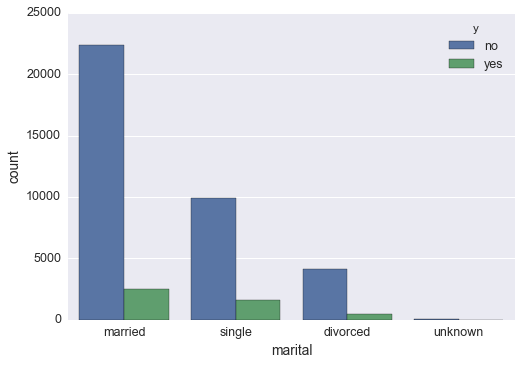

In [12]:
sns.countplot(x='marital', hue='y', data=data);

Женатые люди явно реже соглашаются на предложение, чем одиночки.

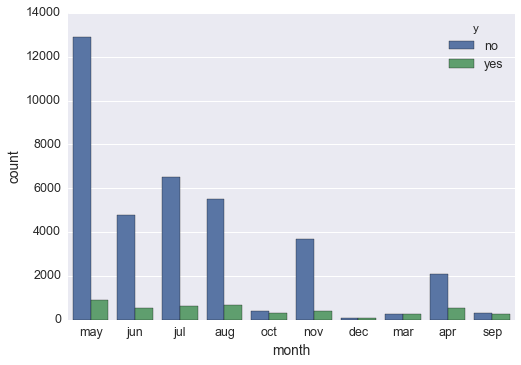

In [13]:
sns.countplot(x='month', hue='y', data=data);

В октябре, декабре, марте и сентябре примерно одинаковое отношение между согласившимся и несогласившимся. В другие месяцы - существенная разница, особенно сильно она проявляется в мае.

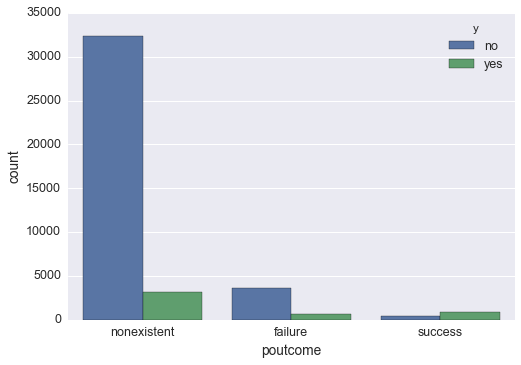

In [14]:
sns.countplot(x='poutcome', hue='y', data=data);

Оценка успешности маркетинговой кампаний влияет на конечный выбор клиента. В случае "успеха" кампании согласившихся клиентов больше, чем тех, кто отказался. 

### Feature preprocessing

Деревья не работают со строковыми категориальными признаками, поэтому необходимо их перевести в числа. Используем One-Hot encoding.

In [15]:
binary_columns = ['contact', 'y']

for col in binary_columns:
    data[col] = pd.factorize(data[col])[0]

In [16]:
nominal_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan' , 'month' , 'day_of_week', 'poutcome']

for col in nominal_columns:
    data[col] = data[col].astype('category')

In [17]:
for col in nominal_columns:
    data = data.join(pd.get_dummies(data[col], prefix = col), how = 'outer')

data = data.drop(nominal_columns, 1)
data.head()

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,0,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [18]:
y = data['y']
X = data.drop('y', axis = 1)

## Кросс-валидация

- 80% - выборка данных для обучения, внутри нее при обучении каждого из классификаторов будет происходить кросс-валидация.
- 20% - отложенная выборка, на ней проверяется качество классификаторов. Позволяет избежать переобучения.

Так как наблюдается сильное различие в количестве примеров одного из классов, принято решение для обеих выборок сохранить текущее отношение классов (параметр stratify)

In [19]:
from sklearn.model_selection import train_test_split

rnd_seed = 25 # для последующей воспроизводимости
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, train_size=0.8, random_state = rnd_seed, stratify = y)

# 2. Обучение классификаторов

*Вывод матрицы неточностей*

In [20]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(conf_matrix, annot=True, fmt="d")  

*Метрики*

In [21]:
from sklearn.metrics import roc_auc_score # Метрика Roc-Auc
from sklearn.metrics import accuracy_score # Метрика Верность

*Другое*

In [22]:
from sklearn.model_selection import GridSearchCV # Сетка параметров для выявления лучшего

rnd_seed = 25 

*Метод, вычисляющий и визуализирующий важности признаков при классификации*

In [23]:
def plot_feature_importance(clf):
    
    importances = clf.feature_importances_[:20]
    std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)[:30]
    indices = np.argsort(importances)[::-1][:20]
    
    print("Feature ranking:")
    
    for f in range(20):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))   
    columns=[]
    for i in range(len(indices)):
        columns.append(data.columns[indices[i]])
        
    plt.figure()
    plt.title("Feature importances (first 20)")
    plt.bar(range(20), importances[indices], color="r", align="center", yerr=std[indices])
    plt.xticks(range(20),columns, rotation=90)
    plt.xlim([-1, 20])
    plt.show()

*Функция, позволяющая отобразить ROC кривые классификаторов*

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(clfs, clf_names, X_test, y_test):
    for clf, name in zip(clfs, clf_names):
        target = clf.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, target[:,1])
        roc_auc = auc(fpr, tpr)
       
        plt.plot(fpr, tpr, label=name + ' ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--') # пунктирная линия для отображения худшего возможного классификатора ("монетки" 50% на 50%)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [58]:
def print_metrics(clf, X_holdout, y_holdout):
    print('ROC-AUC = %s' % roc_auc_score(y_holdout, clf.predict_proba(X_holdout)[:,1]))
    print('Accuracy = %s' % accuracy_score(y_holdout, clf.predict(X_holdout)))

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

*Обучим на стандартных параметрах*

In [31]:
rfc = RandomForestClassifier(random_state=rnd_seed)
rfc.fit(X_train, y_train)

print_metrics(rfc, X_holdout, y_holdout)

ROC-AUC = 0.90857049566
Accuracy = 0.905802379218


*Попробуем найти лучшие параметры (scoring = roc_auc)*

In [32]:
rfc_params = {'n_estimators': np.arange(50, 251, 50),
              'max_features': np.arange(4, 29, 4),
              'min_samples_leaf': np.arange(1, 20, 4)
             }

In [33]:
rfc_grid = GridSearchCV(
    estimator=RandomForestClassifier(n_jobs=-1, random_state=rnd_seed),
    param_grid=rfc_params,
    cv=3,
    scoring='roc_auc',
    verbose=True, 
    n_jobs=-1)

In [36]:
rfc_grid.fit(X_train, y_train) # обучим с 3 фолдами кросс-валидации

Fitting 3 folds for each of 175 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed: 24.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=25,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([ 50, 100, 150, 200, 250]), 'min_samples_leaf': array([ 1,  5,  9, 13, 17]), 'max_features': array([ 4,  8, 12, 16, 20, 24, 28])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

In [37]:
rfc_grid.best_params_ # лучшие параметры для случайного леса

{'max_features': 24, 'min_samples_leaf': 9, 'n_estimators': 250}

In [38]:
rfc_grid.best_score_ # ROC-AUC для лучших параметров на кросс-валидации

0.94927997158916044

In [39]:
# обучим случайный лес на лучших параметрах

rfc = RandomForestClassifier(n_estimators = rfc_grid.best_params_['n_estimators'],
                             max_features = rfc_grid.best_params_['max_features'],
                             random_state=rnd_seed,
                             min_samples_leaf=rfc_grid.best_params_['min_samples_leaf'],
                             n_jobs = -1)



rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=24, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=9,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=250, n_jobs=-1, oob_score=False, random_state=25,
            verbose=0, warm_start=False)

In [59]:
print_metrics(rfc, X_holdout, y_holdout)

ROC-AUC = 0.947386448064
Accuracy = 0.915634862831


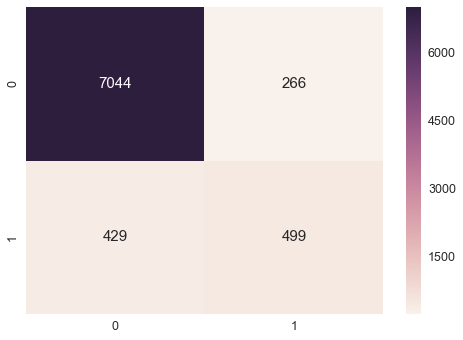

In [60]:
plot_confusion_matrix(y_holdout, rfc.predict(X_holdout))

Feature ranking:
1. feature 2 (0.415854)
2. feature 10 (0.146451)
3. feature 9 (0.129221)
4. feature 0 (0.043894)
5. feature 4 (0.039879)
6. feature 8 (0.025585)
7. feature 7 (0.018978)
8. feature 6 (0.016525)
9. feature 3 (0.015162)
10. feature 1 (0.005503)
11. feature 5 (0.004924)
12. feature 11 (0.004873)
13. feature 12 (0.002269)
14. feature 16 (0.002168)
15. feature 15 (0.000906)
16. feature 19 (0.000736)
17. feature 18 (0.000694)
18. feature 17 (0.000329)
19. feature 14 (0.000311)
20. feature 13 (0.000298)


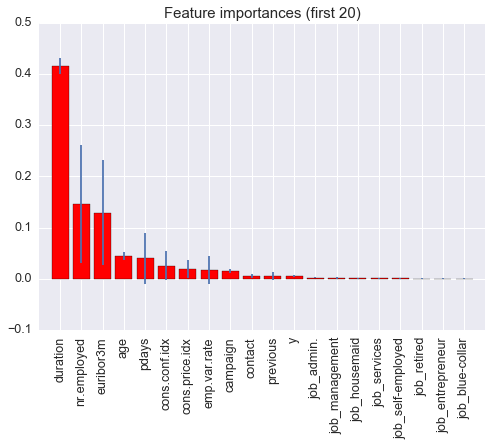

In [42]:
plot_feature_importance(rfc)

## Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

*Обучим на стандартных параметрах*

In [44]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

print_metrics(gbc, X_holdout, y_holdout)

0.94528618684843624

*Находим лучшие параметры для Gradient Boosting*

In [45]:
gbc_params = {'n_estimators': np.arange(10, 130, 10),
              'learning_rate': np.arange(0.1, 2, 0.1)}

In [46]:
gbc_grid = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=rnd_seed),
    param_grid=gbc_params,
    cv=3,
    scoring='roc_auc',
    verbose=True, 
    n_jobs=-1)

In [47]:
gbc_grid.fit(X_train.values, y_train) # обучим с 3 фолдами кросс-валидации

Fitting 3 folds for each of 228 candidates, totalling 684 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 684 out of 684 | elapsed: 51.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=25,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9]), 'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

In [48]:
gbc_grid.best_params_ # лучшие параметры для градиентного бустинга

{'learning_rate': 0.20000000000000001, 'n_estimators': 120}

In [49]:
gbc_grid.best_score_ # ROC-AUC для лучших параметров на кросс-валидации

0.94831213511257451

In [50]:
# обучим градиентный бустинг на лучших параметрах

gbc = GradientBoostingClassifier(learning_rate = gbc_grid.best_params_['learning_rate'],
                                n_estimators = gbc_grid.best_params_['n_estimators'],
                                random_state=rnd_seed)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.20000000000000001, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=120, presort='auto', random_state=25,
              subsample=1.0, verbose=0, warm_start=False)

In [61]:
print_metrics(gbc, X_holdout, y_holdout)

ROC-AUC = 0.945487183947
Accuracy = 0.915149308084


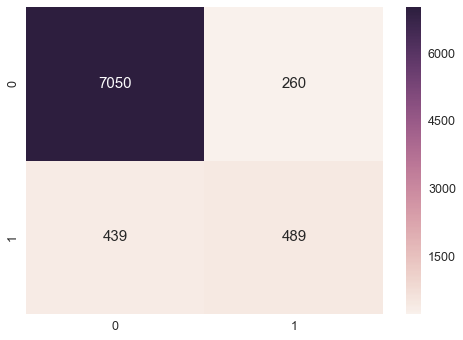

In [62]:
plot_confusion_matrix(y_holdout, gbc.predict(X_holdout))

## MLP

In [53]:
from sklearn.neural_network import MLPClassifier

*Обучим на стандартных параметрах*

In [84]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

print_metrics(mlpc, X_holdout, y_holdout)

ROC-AUC = 0.931720393651
Accuracy = 0.859917455693


*Попробуем найти лучшие параметры (scoring = roc_auc)*

In [138]:
mlpc_params = [{'solver': ['adam', 'sgd', 'lbfgs'], 
               'alpha': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
               'hidden_layer_sizes': [(100,), (200,), (300,), (400,), (500,)]}]#, 
               #'learning_rate': ['constant', 'invscaling', 'adaptive']}]

In [139]:
mlpc_grid = GridSearchCV(
    estimator=MLPClassifier(random_state=rnd_seed),
    param_grid=mlpc_params,
    cv=3,
    scoring='roc_auc',
    verbose=True, 
    n_jobs=-1)

In [140]:
mlpc_grid.fit(X_train, y_train) # обучим с 3 фолдами кросс-валидации

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 22.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=25, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'hidden_layer_sizes': [(100,), (200,), (300,), (400,), (500,)], 'solver': ['adam', 'sgd', 'lbfgs'], 'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

In [141]:
mlpc_grid.best_params_ # лучшие параметры для нейронной сети

{'alpha': 1e-05, 'hidden_layer_sizes': (400,), 'solver': 'adam'}

In [142]:
mlpc_grid.best_score_ # ROC-AUC для лучших параметров на кросс-валидации

0.93337778609142563

In [162]:
# обучим нейронную сеть на лучших параметрах

mlpc = MLPClassifier(solver = mlpc_grid.best_params_['solver'],
                    alpha = mlpc_grid.best_params_['alpha'],
                    hidden_layer_sizes = mlpc_grid.best_params_['hidden_layer_sizes'])


mlpc.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(400,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [163]:
print_metrics(mlpc, X_holdout, y_holdout)

ROC-AUC = 0.924519434879
Accuracy = 0.878247147366


Видимо, в данном случае все-таки классификатор переобучился, поэтому на отложенной выборке такие результаты. Стандартный показывает результат получше. Будем использовать его.

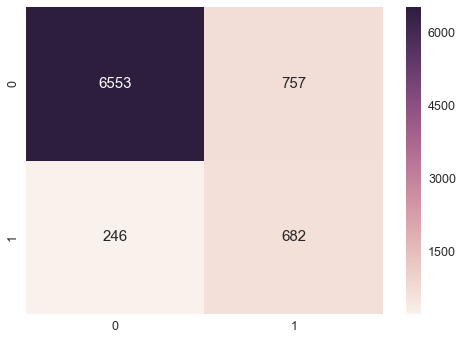

In [164]:
plot_confusion_matrix(y_holdout, mlpc.predict(X_holdout))

## Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

*Обучим на стандартных параметрах*

In [89]:
dtc = DecisionTreeClassifier(random_state=rnd_seed)
dtc.fit(X_train, y_train)

print_metrics(dtc, X_holdout, y_holdout)

ROC-AUC = 0.736975211095
Accuracy = 0.89050740471


*Попробуем найти лучшие параметры (scoring = roc_auc)*

In [91]:
dtc_params = {'min_samples_split' : np.arange(10, 500, 20),
              'max_depth': np.arange(1, 20, 2)
             }

In [92]:
dtc_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=rnd_seed),
    param_grid=dtc_params,
    cv=3,
    scoring='roc_auc',
    verbose=True, 
    n_jobs=-1)

In [93]:
dtc_grid.fit(X_train, y_train) # обучим с 3 фолдами кросс-валидации

Fitting 3 folds for each of 250 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=25, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490]), 'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

In [94]:
dtc_grid.best_params_ # лучшие параметры для дерева решений

{'max_depth': 17, 'min_samples_split': 410}

In [95]:
dtc_grid.best_score_ # ROC-AUC для лучших параметров на кросс-валидации

0.94129036645765696

In [148]:
# обучим случайный лес на лучших параметрах

dtc = DecisionTreeClassifier(max_depth = dtc_grid.best_params_['max_depth'],
                             min_samples_split = dtc_grid.best_params_['min_samples_split'],
                             random_state=rnd_seed)


dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=410, min_weight_fraction_leaf=0.0,
            presort=False, random_state=25, splitter='best')

In [149]:
print_metrics(dtc, X_holdout, y_holdout)

ROC-AUC = 0.937926390985
Accuracy = 0.910172371935


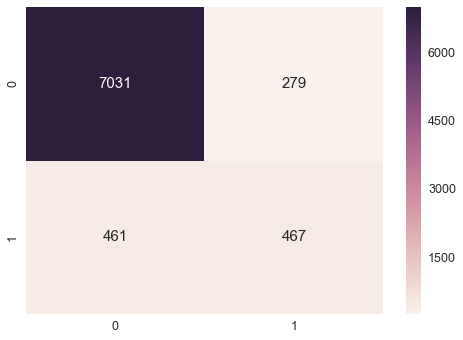

In [150]:
plot_confusion_matrix(y_holdout, dtc.predict(X_holdout))

## Сравнение

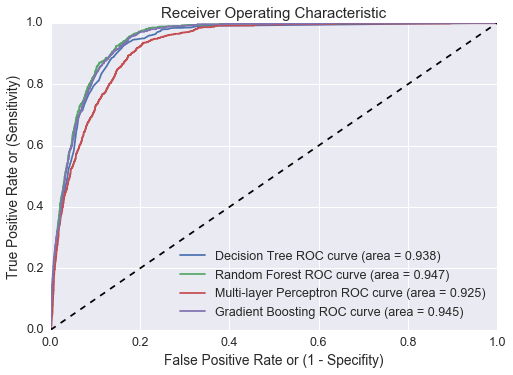

In [165]:
clfs = [dtc, rfc, mlpc, gbc]
clfs_names = ['Decision Tree', 'Random Forest', 'Multi-layer Perceptron', 'Gradient Boosting']
plot_roc_curve(clfs, clfs_names, X_holdout, y_holdout)

## Выводы

В соответствии с полученными результатами на отложенной выборке, мы можем выстроить следующую градацию классификаторов по основной метрике roc_auc:

1. Random Forest
2. Gradient Boosting
3. Decision Tree
4. Multi-layer Perceptron


Более того, Random Forest оказался лучшим и среди рейтинга по метрике Accuracy.

В условиях несбалансированной выборки, метрика accuracy в большинстве случаев не имеет смысла, практически во всех классификаторах выдает высокие показатели. При этом классифицируя все данные к мажоритарному классу. 

В данном случае метрика roc_auc является наиболее предпочтительной, так как она наименее чувствительна к несбалансированной выборке. 

Более того, исходя из графика важности признаков для Random Forest, можно сказать, что топ-3 самыми важными признаками являются: продолжительность последнего разговора, количество людей, задействованных в маркетинговой компании и предлагаемая межбанковская трехмесячная ставка (еженедельный индикатор).